In [36]:
# Import whatever will be used in this notebook
import pylab
import math
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Import from sklearn
#Estimators:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Set generation 
from sklearn.model_selection import train_test_split

#Performance metrics:
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

#K-fold crossvalidation
from sklearn.model_selection import KFold

In [37]:
# Surpress warnings regarding the version of the pandas library which is used 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
# Make variable for the imported models
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()
modelKNN = KNeighborsClassifier

In [39]:
#read in the csv file and remove the extra ID column
credit = pd.read_csv("C:\\Users\\Jeroen\\Desktop\\Ubiqum\\Data Science\\Excel Files\\credit_3.csv", header = 0)
credit = credit[credit.columns[1:len(credit.columns)]]

In [40]:
#Give head of the df so it is easily visible which vars should function as independent variable
credit.head()
credit.tail()

,PAYSTAT_SEP,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE,DEFAULT
29461,0.017741,1.849291,0.164656,0.412625,1.132625,0.387036,1
29462,-0.875875,-0.682263,-0.234720,-0.127385,-1.004498,0.822032,1
29463,3.592206,-0.656821,-0.344828,-1.053118,-0.758007,0.169538,0
29464,0.911357,-0.727253,4.803964,-0.667396,1.388081,0.604534,0
29465,0.017741,-0.057084,-0.220274,-0.898829,1.384032,1.148279,0


In [41]:
#Select the features that will function as independent variables:
credit_indep = credit.iloc[:, 0:(len(credit.columns)-1)]
credit_indep.head()

,PAYSTAT_SEP,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE
0,1.804974,-0.652117,-0.344828,-1.130262,-0.651099,-1.244199
1,-0.875875,-0.668758,-0.344828,-0.358818,-0.999086,-1.026701
2,0.017741,-0.309746,-0.253840,-0.590251,-0.649230,-0.156709
3,0.017741,-0.069778,-0.224950,-0.898829,1.350797,0.169538
4,-0.875875,-0.588526,-0.224950,-0.898829,-0.754215,2.344518


In [42]:
#Select the dependent variable and turn it into a seperate vector:
credit_dep = credit['DEFAULT']
credit_dep.head()

0    0
1    0
2    1
3    1
4    1
Name: DEFAULT, dtype: int64

In [43]:
credit.describe()

,PAYSTAT_SEP,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE,DEFAULT
count,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,29466.000000
mean,-3.208420e-15,-2.103345e-16,2.656975e-16,-3.281235e-15,3.921537e-16,4.803280e-16,0.792914
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.405225
min,-1.769491e+00,-2.943419e+00,-3.448283e-01,-1.207406e+00,-4.485552e+00,-1.570446e+00,0.000000
25%,-8.758749e-01,-6.490855e-01,-2.847691e-01,-8.988289e-01,-9.815463e-01,-8.092031e-01,1.000000
50%,1.774131e-02,-3.848821e-01,-2.132614e-01,-2.045296e-01,-2.549452e-01,-1.567091e-01,1.000000
75%,1.774131e-02,2.204590e-01,-4.252409e-02,5.669140e-01,9.783657e-01,6.045339e-01,1.000000
max,7.166671e+00,1.233379e+01,5.201533e+01,6.429886e+00,1.474319e+01,4.736996e+00,1.000000


In [44]:
#generate a dataframe that functions as a trainingset

X_train, X_test, y_train, y_test = train_test_split(credit_indep, credit_dep, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20626, 6) (20626,)
(8840, 6) (8840,)


In [45]:
# Do a Kfold cross validation on the training data for k = 5

knn = KNeighborsClassifier(n_neighbors = 5)
CVscores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
print(CVscores.mean())

0.8134870164032775


In [48]:
# Do a Kfold cross validation on the training data to select optimal K 
k_range = range(2,100)
k_scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    CVscores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
    k_scores.append(CVscores.mean())
print(k_scores)

[0.6958684089399247, 0.7989905747799787, 0.7790644880258284, 0.8134870164032775, 0.8067478924075896, 0.822407735384844, 0.8183355955679321, 0.8250259173568951, 0.8235232748443432, 0.8266261172672833, 0.8258987857277523, 0.8280322837411076, 0.8268685297700513, 0.8292927488289585, 0.828759333186958, 0.8303594860817327, 0.8300199863372628, 0.8304563382453679, 0.8304078886557436, 0.8311351731796612, 0.8313774446355889, 0.8315714075487328, 0.830795767466418, 0.8320562325542689, 0.8312805924719541, 0.8318136319890472, 0.8319590512813401, 0.8323952621426048, 0.8328800871481409, 0.8333649121536771, 0.8330740030456714, 0.8332194693535777, 0.8326376746453731, 0.8331224996509091, 0.8322982924399364, 0.833122734728976, 0.8321530377022907, 0.8327347853948817, 0.8322984334867766, 0.8329288188314458, 0.8329771978976499, 0.8325894836416226, 0.8326377921844065, 0.832831708081937, 0.8321528731476437, 0.8321045175892461, 0.8327347383792685, 0.8324438762868761, 0.832734691363655, 0.8327832820001193, 0.832

Text(0,0.5,'Cross validation score')

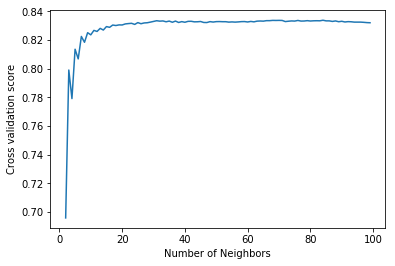

In [49]:
plt.plot(k_range, k_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross validation score')

In [34]:
# Check classification accuracy using the top K that was retrieved from the Knn cross-validation
knn = KNeighborsClassifier(n_neighbors = k_range[((k_scores.index(max(k_scores))))])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))

0.8273755656108597
0.36360544201640865


In [35]:
# Do a Kfold cross validation on the training data for a logistic regression

logregression = LogisticRegression(solver='liblinear')
CVscores = cross_val_score(logregression, X_train, y_train, cv = 10, scoring = "accuracy")
print(CVscores.mean())

0.8244940688906024


In [15]:
# Check classification accuracy using the logregression

logregression.fit(X_train, y_train)
y_pred = logregression.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))

0.8200226244343891
0.2864906217848947


In [16]:
#train using a Support vector machine, a random forest and a logistic regression, 

modelSVC.fit(X_train, y_train)
modelRF.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#Print cross-validation scores 

print(cross_val_score(modelSVC, X_train, y_train)) 
print(cross_val_score(modelRF, X_train, y_train)) 

#Print model validation scores 

print(modelSVC.score(X_train, y_train))
print(modelRF.score(X_train, y_train))


In [19]:
# Check classification accuracy of using the Support Vector Machine
y_pred = modelSVC.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))

0.8307692307692308
0.3680148205395184


In [20]:
# Check classification of accuracy using the Random forest
y_pred = modelRF.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))

0.8054298642533937
0.356545945678306
